In [ ]:


from matplotlib import pyplot as plt
"""
This notebook generates the figures presented in the paper. If other data should be used the paths in the cells need to be adapted
"""
import os

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    "axes.labelsize": 8,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "legend.fontsize": 7,
    "axes.grid" : True,
    "axes.linewidth": 0.75,
    "pgf.preamble": "\n".join([r'\usepackage{amsmath}', r'\usepackage{bm}', r'\usepackage{amsfonts}', r'\usepackage{amssymb}'])
})
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{bm} \usepackage{amsfonts} \usepackage{amssymb}')

parent_dir =  os.path.dirname(os.getcwd())

pts2inch = 1/72.27
ratio = 1.618
max_pts = 433
frac = 0.6

violations: 0
violations: 0
violations: 0
violations: 0


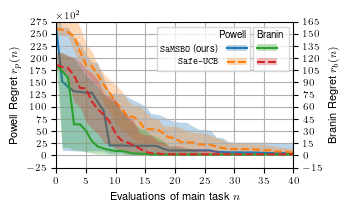

In [ ]:
import pickle
import torch
from datetime import datetime

glob_opt = {"Branin": 0.397887, "Powell": 0}

fig,ax = plt.subplots(1,figsize=(max_pts*frac*pts2inch,max_pts*frac/ratio*pts2inch))
files = [parent_dir+"/data/SamsBO/MTPowell_rho_15_prior_005.obj",
         parent_dir+"/data/SafeUCB/MTPowell.obj",
         parent_dir+"/data/SamsBO/MTBranin_rho_15_prior_005.obj",
         parent_dir+"/data/SafeUCB/MTBranin.obj"]

def plot2(ax,str,i):
    if str.find('.obj') != -1:
        with open(str,'rb') as file:
            data = pickle.load(file)
            best_values = -torch.tensor([y[-1] for y in data['bests']])
            best_values -= -glob_opt["Branin"] if "Branin" in str else 0
            q10, q90 = torch.quantile(best_values, 0.1, dim=0), torch.quantile(best_values, 0.9, dim=0)
            muy = torch.median(best_values,dim=0).values
            vios = 0
            for set in data['data_sets']:
                _,tt,yt = tuple(set)
                yt0 = yt[tt.squeeze() == 0]
                vios += torch.sum(-yt0>150 if "Branin" in str else -yt0>35.e3)
            print(f"violations: {vios}")
    x = torch.arange(len(muy))
    fill = ax.fill_between(x,q90,q10,color=f"C{i}",alpha=.3, linewidth=0)
    line,= ax.plot(x,muy, color=f"C{i}",linestyle = '--' if (i+1)%2==0 else '-')

    return (line,fill)

h = []
for i in range(len(files)//2):
    h.append(plot2(ax,files[i],i))
ax2 = ax.twinx()
for i in range(len(files)//2,len(files)):
    h.append(plot2(ax2,files[i],i))
   
leg = ax.legend(h[:2],[r"\texttt{SaMSBO} (ours)",r"\texttt{Safe-UCB"], markerfirst=False, markerscale= 1.5, title="Powell", title_fontsize=7, loc='upper right', bbox_to_anchor=(.839, 1.),fancybox=False)
leg._legend_box.align = "right"
leg2 = ax2.legend(h[2:],["",""], title="Branin", loc='upper right',title_fontsize=7,markerscale= 1,fancybox=False)
leg2._legend_box.align = "right"
ax.set_xlabel(r"Evaluations of main task $n$")
ax.set_xlim(0,40)
ymin2 = -15; ymax2 = 165
ymin1 = -2500; ymax1 = 27500
n_ticks = 13
ax.set_yticks(torch.linspace(ymin1,ymax1,n_ticks))
ax2.set_yticks(torch.linspace(ymin2,ymax2,n_ticks))
ax.set_ylim(ymin1,ymax1)
ax2.set_ylim(ymin2,ymax2)
ax.set_ylabel(r"Powell Regret $r_p(n)$")
ax2.set_ylabel(r"Branin Regret $r_b(n)$")
ax.ticklabel_format(axis='y',style='sci',scilimits=(2,2))
ax2.grid(False)
fig.tight_layout()
plt.show()
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
# fig.savefig(f"../plots/synthetic_fun_comp.pdf", bbox_inches='tight')

violations: 0
violations: 0
violations: 300
violations: 343


Text(0, 0.5, 'Cost Laser Chain, $r_l(n)$')

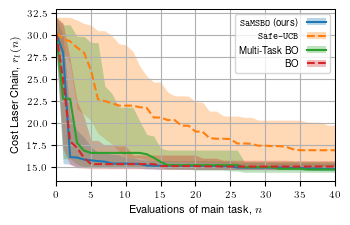

In [ ]:
import pickle
import torch


fig,ax = plt.subplots(1,figsize=(max_pts*frac*pts2inch,max_pts*frac/ratio*pts2inch))
files = [parent_dir+"/data/SamsBO/LbSync_rho_15_prior_005.obj",
         parent_dir+"/data/SafeUCB/LbSync.obj",
         parent_dir+"/data/MTBO/LbSync.obj",
         parent_dir+"/data/VanillaBO/LbSync.obj"]

def plot2(ax,str,i):
    if str.find('.obj') != -1:
        with open(str,'rb') as file:
            data = pickle.load(file)
            best_values = -torch.tensor([y[-1] for y in data['bests']])
            q10, q90 = torch.quantile(best_values, 0.1, dim=0), torch.quantile(best_values, 0.9, dim=0)
            muy = torch.median(best_values,dim=0).values
            vios = 0
            for set in data['data_sets']:
                xt,tt,yt = tuple(set)
                yt0 = yt[tt.squeeze() == 0].squeeze()
                vios += torch.sum(-yt0[:40]>40)
            print(f"violations: {vios}")
    x = torch.arange(len(muy))
    fill = ax.fill_between(x,q10,q90,color=f"C{i}",alpha=.3, linewidth=0)
    line,= ax.plot(x,muy, color=f"C{i}",linestyle = '--' if (i+1)%2==0 else '-')
    return (line,fill)

h = []
for i in range(len(files)):
    h.append(plot2(ax,files[i],i))


leg = ax.legend(h,[r"\texttt{SaMSBO} (ours)",r"\texttt{Safe-UCB",r"Multi-Task BO",r"BO"], markerfirst=False, title_fontsize=7, loc='upper right')
ax.set_xlim(0,40)
ax.set_xlabel(r"Evaluations of main task, $n$")
ax.set_ylabel(r"Cost Laser Chain, $r_l(n)$")
# fig.savefig(parent_dir+"/plots/laser_chain_comp.pdf", bbox_inches='tight')